<a href="https://colab.research.google.com/github/Choiyh1116/AI_capstone/blob/CHOI/imageIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

# 새 섹션

프레임 추출 

In [1]:

import torch
import cv2
import os



vidcap = cv2.VideoCapture('/content/drive/MyDrive/testVideo/test1.mp4')

if not vidcap.isOpened():
    print("Could not Open")
    exit(0)

count = 0

while(vidcap.isOpened()): 
  ret, image = vidcap.read()

  image = cv2.resize(image, (960, 540))

  if(int (vidcap.get(1) % 3000 == 0)):
    print('Saved frame number : ' + str(int(vidcap.get(1))))
    cv2.imwrite('/content/drive/MyDrive/testVideo/testFrame/%d image.png'%count, image)
    count += 1

vidcap.release()

KeyboardInterrupt: ignored

Frame 비교

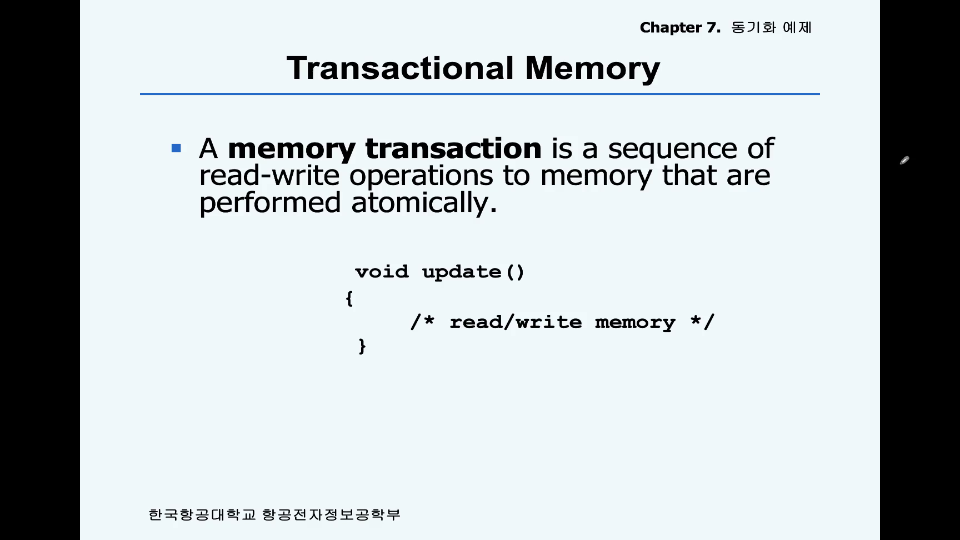

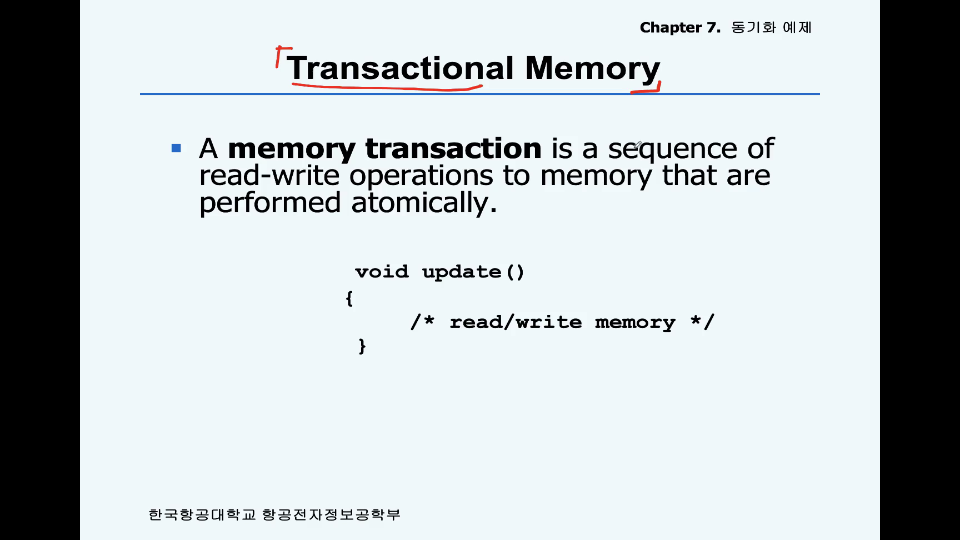

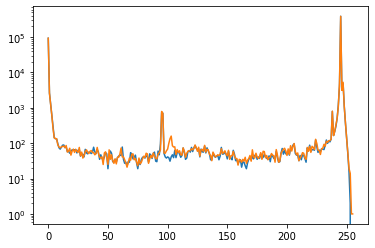

In [11]:
""" calcHist 인수
cv2.calcHist(images, channel, mask, histSize, ranges [, hist [, accumulate]]) [] : 생략 가능
images : 입력 영상 - 리스트 형식[]
channels : 히스토그램 구할 채널을 나타내는 리스트 [0], [0,1], [0,1,2] 
GRAYSCALE 영상에선 [0] BGR 영상에선 [0] : B, [1] : G, [2] : R 
mask : 마스크 영상, 입력 영상 전체에 히스토그램 구하려면 None
histSize : 히스토그램 각 차원의 크기를 나타내는 리스트 
"""
import cv2
import matplotlib.pyplot as plt
import numpy as np

#colab 전용 image show방식
from google.colab.patches import cv2_imshow

img_path1 = '/content/drive/MyDrive/testVideo/testFrame/0 image.png'
img_path2 = '/content/drive/MyDrive/testVideo/testFrame/1 image.png'

src0 = cv2.imread(img_path1,cv2.IMREAD_GRAYSCALE)
src1 = cv2.imread(img_path2,cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([src0], [0], None, [256], [0, 256])

img = cv2.imread(img_path1)
cv2_imshow(img)
print("\n")
img = cv2.imread(img_path2)

cv2_imshow(img)

img = [src0, src1]

for i in img:
  hist = cv2.calcHist([i], [0], None, [256], [0,256])
  plt.yscale('log')
  plt.plot(hist)

In [18]:
import torch
import cv2
import os
import numpy as np
import matplotlib.pylab as plt


vidcap = cv2.VideoCapture('/content/drive/MyDrive/testVideo/dogs.mp4')
methods = ['CORREL', 'CHISQR', 'INTERSECT', 'BHATTACHARYYA', 'EMD']
hists = []

if not vidcap.isOpened():
    print("Could not Open")
    exit(0)

count = 0
frameGap = 30
maxFrame = 6300

while(vidcap.isOpened()): 
    ret, image = vidcap.read()
    if ret:
        #image = cv2.resize(image, (960, 540))
        
        if(int (vidcap.get(1) % frameGap == 0)):
            if(int (vidcap.get(1) > maxFrame)):
                break
            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
            cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
            hists.append(hist)
                
            if(len(hists)==2):
                print('\n\n프레임 번호 : ' + str(int(vidcap.get(1))))
                print("\n 실제시간 " + (str(int(vidcap.get(1))/30)))
                query = hists[0]
                for index, name in enumerate(methods):
                    print('\n%-10s' % name, end = '\t')
    
                    for i, histogram in enumerate(hists):
                        compare = cv2.compareHist(query, histogram, index) 
        
                        if(index == cv2.HISTCMP_INTERSECT):
                            compare = compare/np.sum(query)
                        print("프레임%d :%7.2f"% (int(vidcap.get(1))-(frameGap*(1-i)) , compare), end='\t')
                        if(compare>1000):
                          cv2.imwrite('/content/drive/MyDrive/testVideo/testFrame/%d dog.png'%count, image)
                del(hists[0])
            
            
            count += 1
    else:
        break

vidcap.release()



프레임 번호 : 60

 실제시간 2.0

CORREL    	프레임30 :   1.00	프레임60 :   0.82	
CHISQR    	프레임30 :   0.00	프레임60 :  61.78	
INTERSECT 	프레임30 :   1.00	프레임60 :   0.69	
BHATTACHARYYA	프레임30 :   0.00	프레임60 :   0.30	
EMD       	프레임30 :   0.00	프레임60 :  23.10	

프레임 번호 : 90

 실제시간 3.0

CORREL    	프레임60 :   1.00	프레임90 :   0.93	
CHISQR    	프레임60 :   0.00	프레임90 :  44.73	
INTERSECT 	프레임60 :   1.00	프레임90 :   0.76	
BHATTACHARYYA	프레임60 :   0.00	프레임90 :   0.25	
EMD       	프레임60 :   0.00	프레임90 :  15.73	

프레임 번호 : 120

 실제시간 4.0

CORREL    	프레임90 :   1.00	프레임120 :   0.95	
CHISQR    	프레임90 :   0.00	프레임120 :  18.52	
INTERSECT 	프레임90 :   1.00	프레임120 :   0.85	
BHATTACHARYYA	프레임90 :   0.00	프레임120 :   0.18	
EMD       	프레임90 :   0.00	프레임120 :   8.99	

프레임 번호 : 150

 실제시간 5.0

CORREL    	프레임120 :   1.00	프레임150 :   0.97	
CHISQR    	프레임120 :   0.00	프레임150 :   8.20	
INTERSECT 	프레임120 :   1.00	프레임150 :   0.85	
BHATTACHARYYA	프레임120 :   0.00	프레임150 :   0.16	
EMD       	프레임120 :   0.00	프레임150 :   6.71	

프레임 번호 : 180

 실제시간 6.0

CORR